# BIWI Data Preparation

Preprocessing this dataset is done following the instructions and script provided by: https://github.com/shamangary/FSA-Net/blob/master/README.md <br>
The TYY_create_db_biwi.py script is used to create a BIWI_noTrack.npz file, which is processed below and turned into an Images directory with <br> a labels.csv file to match the 
design of other dataset in this project.

In [1]:
import numpy as np, cv2, matplotlib.pyplot as plt, os, shutil, pandas as pd, cv2, PIL.Image as Image
os.chdir('..')
from utility_scripts.pose_estimation_utilities import draw_axis

In [2]:
data_path = os.path.join('data', 'datasets', 'head pose estimation', 'BIWI')
os.path.exists(data_path)

True

In [3]:
images_dir = os.path.join(data_path, 'Images')
os.makedirs(images_dir, exist_ok = True)

In [4]:
biwi = np.load(os.path.join(data_path, 'BIWI_noTrack.npz'))
biwi

NpzFile 'data/datasets/head pose estimation/BIWI/BIWI_noTrack.npz' with keys: image, pose, img_size

## Preparation

In [5]:
image_names = []
rolls = []
pitches = []
yaws = []
for i in range(len(biwi['image'])):
    image = biwi['image'][i]
    yaw, pitch, roll = biwi['pose'][i]

    image_name = f'{i}.jpg'
    cv2.imwrite(
        os.path.join(images_dir, image_name),
        image
    )

    image_names.append(image_name)
    rolls.append(roll)
    pitches.append(pitch)
    yaws.append(yaw)

In [6]:
labels_df = pd.DataFrame(
    data = {
        'filename' : image_names,
        'roll' : rolls,
        'pitch' : pitches,
        'yaw' : yaws
    }   
)

In [ ]:
labels_df.to_csv(os.path.join(data_path, 'labels.csv'), index = False)

# EDA

In [5]:
labels_df = pd.read_csv(os.path.join(data_path, 'labels.csv'))

In [6]:
labels_df.head()

,filename,roll,pitch,yaw
0,0.jpg,-1.566632,7.607223,3.290995
1,1.jpg,-1.930131,7.650885,3.889411
2,2.jpg,-1.946089,7.445381,3.664674
3,3.jpg,-1.896884,7.455991,3.795916
4,4.jpg,-2.123386,7.729789,3.433040


In [15]:
biwi_figure_path = os.path.join('data', 'figures', 'Pose estimation', 'BIWI')
os.makedirs(biwi_figure_path, exist_ok = True)

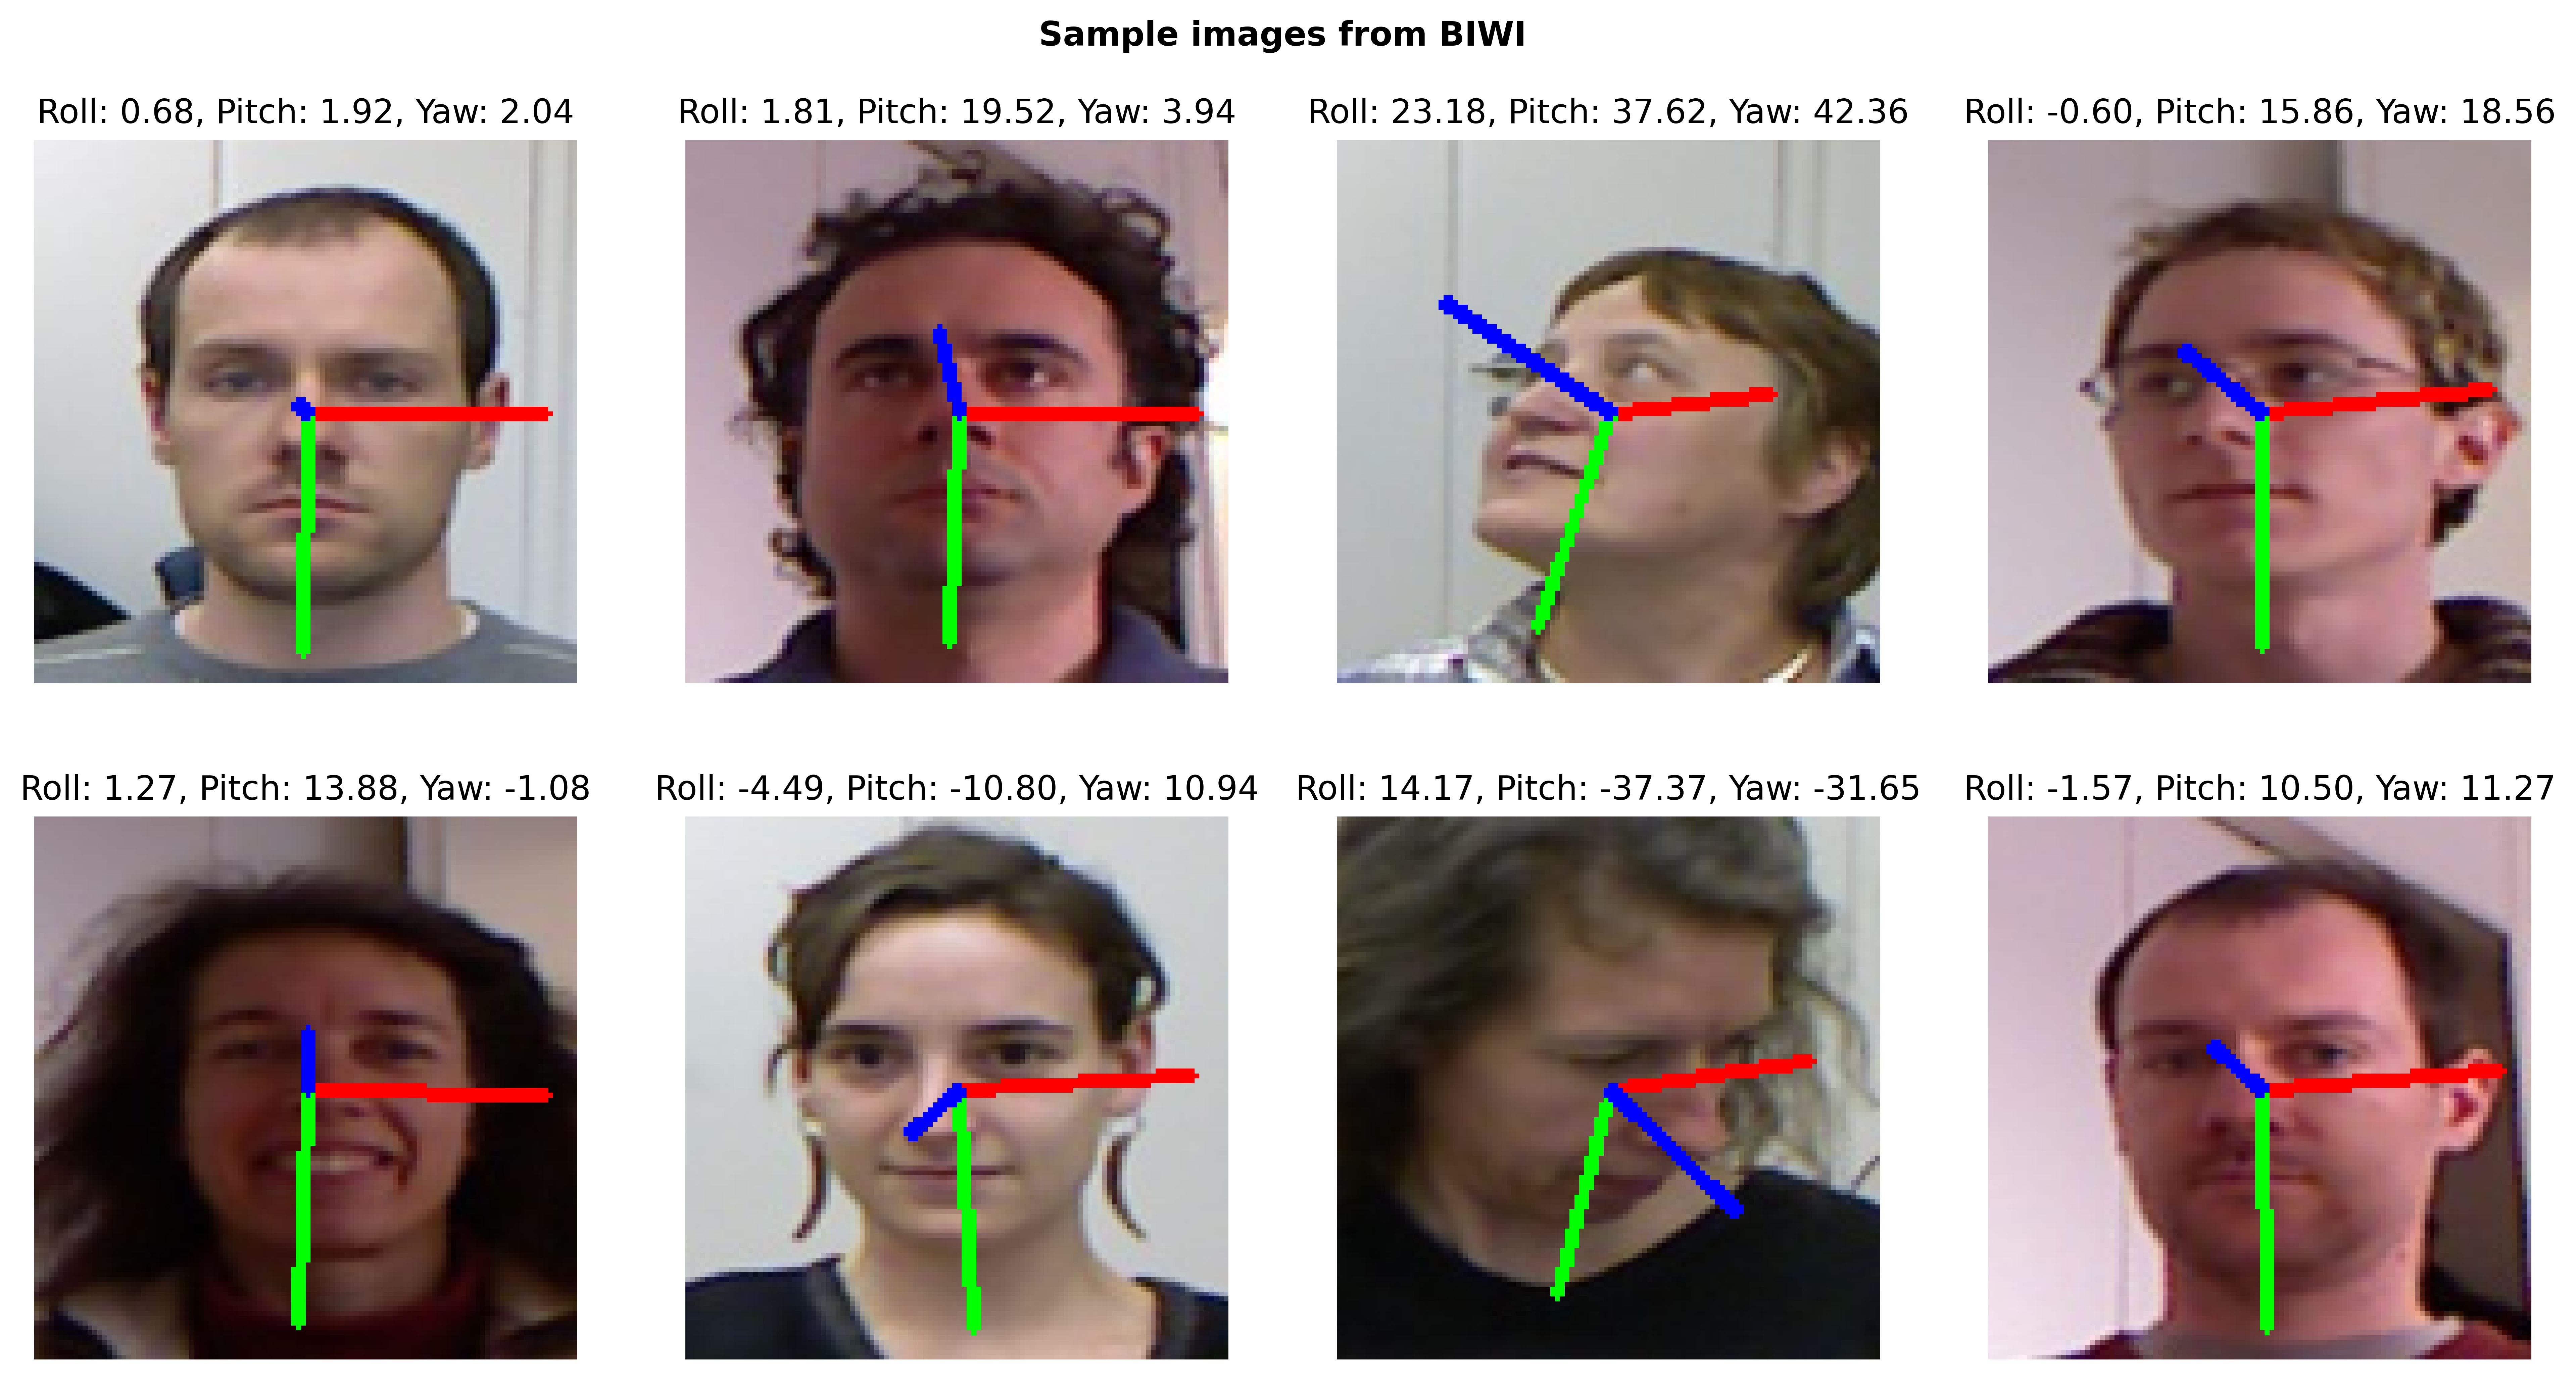

In [16]:
plt.figure(figsize = (16, 8), dpi = 600)
plt.title('Sample images from BIWI', pad = 30, fontweight = 'bold')
plt.axis('off')

for i in range(8):
    idx = np.random.randint(low = 0, high = len(labels_df))
    image_name = labels_df['filename'][idx]
    roll = labels_df['roll'][idx]
    pitch = labels_df['pitch'][idx]
    yaw = labels_df['yaw'][idx]
    image = cv2.imread(os.path.join(images_dir, image_name), cv2.IMREAD_COLOR_RGB)
    image = draw_axis(image, yaw, pitch, roll)
    plt.subplot(2, 4, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Roll: {roll:.2f}, Pitch: {pitch:.2f}, Yaw: {yaw:.2f}')

plt.savefig(
    os.path.join(biwi_figure_path, 'sample images from biwi')
)
plt.show()